In [4]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib as mpl
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 100

Some helper functions:

In [5]:
def plot_x_p_sigma(t,results):
    s = results.states
    exp_x = expect(x, s)
    exp_p = expect(p, s)
    sigma_x2 = expect(x**2, s) - exp_x**2
    sigma_p2 = expect(p**2, s) - exp_p**2

    plt.subplots(figsize=(12,4))
    plt.subplot(121)
    plt.plot(t, exp_x, label='<x>')
    plt.plot(t, exp_p, label='<p>')
    plt.legend()
    plt.subplot(122)
    plt.plot(t, sigma_x2, label='sig_x')
    plt.plot(t, sigma_p2, label='sig_p')
    plt.legend()

In [21]:
def make_wigner_animation(wigners):
    wig = wigners[0]
    wlim= abs(wig).max()
    fig = plt.figure()
    ax_image = plt.imshow(wig,cmap='RdBu', norm=mpl.colors.Normalize(-wlim, wlim))
    def update(n):
        print(".", end='')
        ax_image.set_data(wigners[n])
    anim = animation.FuncAnimation(fig, update, frames=len(wigners))
    plt.close(fig)
    print()
    return anim

In [22]:
def make_winger_functions(results):
    s = results.states
    x = np.linspace(-5,5,50)
    wigners = []
    for i in range(len(s)):
        print("*", end='')
        wigners.append(wigner(s[i],x,x))
    print()
    return wigners

# Demo the code with Harmonic Oscillator Coherent State 

Hilbert space size, basic opeartors

In [8]:
N = 50
w0 =  1 *2*np.pi
a = destroy(N)
n = a.dag()*a
x = a+a.dag()
p = -1j*(a-a.dag())
k = 1
m = 1

In [24]:
H0 = w0 * n
psi0 = coherent(N,2)
t =  np.linspace(0,2,100)
results = sesolve(H0, psi0, t)

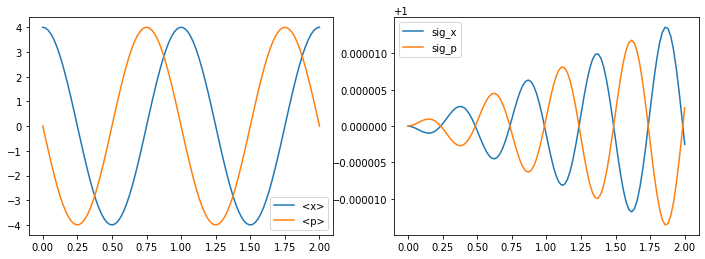

In [25]:
plot_x_p_sigma(t,results)

In [26]:
wigners = make_winger_functions(results)
anim = make_wigner_animation(wigners)
anim

****************************************************************************************************

.....................................................................................................